### DM-08 Quiz
#### 2D visualization of handwritten digit images   

#### Import libraries  

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding, Isomap, TSNE

#### Load data and set parameters  

In [9]:
n_class = 10
digits_img = datasets.load_digits(n_class=n_class)
X_org = digits_img.data
digits = digits_img.target
print(X_org.shape)
print(digits.shape)

n_neighbors = 25
n_components = 2

(1797, 64)
(1797,)


#### Standardization (X_org -> X)  

In [10]:
# Standardization
sc = StandardScaler()
X = sc.fit_transform(X_org) 

#### Manifold learning  

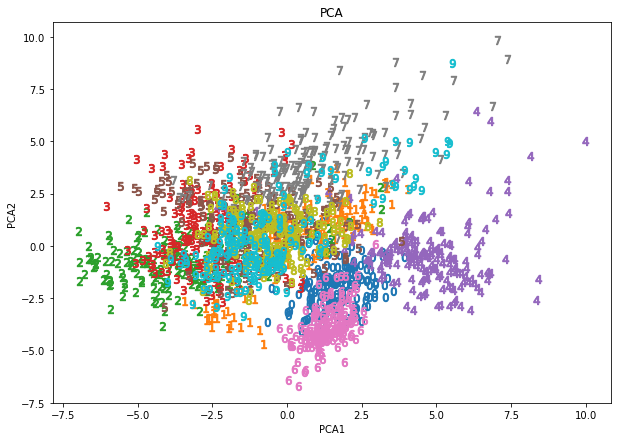

In [11]:
# PCA
Y = PCA(n_components=n_components).fit_transform(X)
plt.figure(figsize=(10,7))
plt.title("PCA")
for i in range(n_class):
    marker = '${}$'.format(i)
    y1 = Y[ digits==i ]
    plt.scatter(y1[:, 0], y1[:, 1], marker=marker, s=70, label=i)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

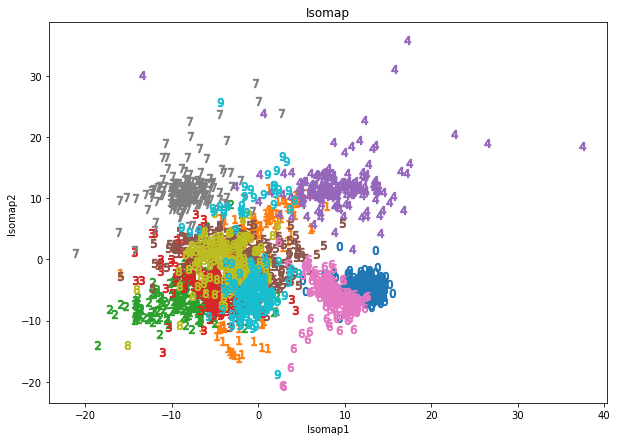

In [12]:
# Isomap
Y = Isomap(n_neighbors=n_neighbors, n_components=n_components).fit_transform(X)
plt.figure(figsize=(10,7))
plt.title("Isomap")
for i in range(n_class):
    marker = '${}$'.format(i)
    y1 = Y[ digits==i ]
    plt.scatter(y1[:, 0], y1[:, 1], marker=marker, s=70, label=i)
plt.xlabel('Isomap1')
plt.ylabel('Isomap2')
plt.show()

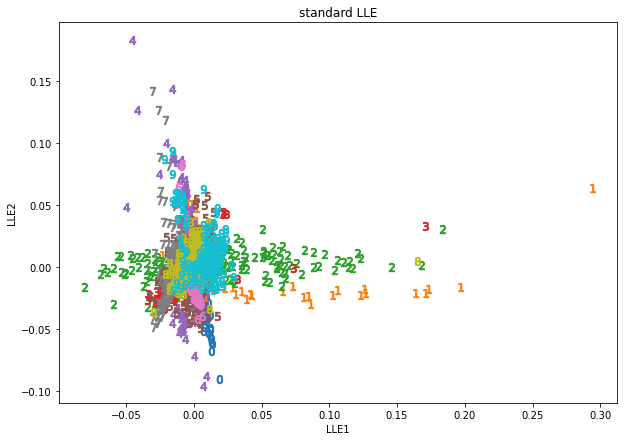

In [13]:
# LLE
Y = LocallyLinearEmbedding(n_neighbors=n_neighbors,
                           n_components=n_components,
                           eigen_solver='auto',
                           method='standard').fit_transform(X)
plt.figure(figsize=(10,7))
plt.title("standard LLE")
for i in range(n_class):
    marker = '${}$'.format(i)
    y1 = Y[ digits==i ]
    plt.scatter(y1[:, 0], y1[:, 1], marker=marker, s=70, label=i)
plt.xlabel('LLE1')
plt.ylabel('LLE2')
plt.show()

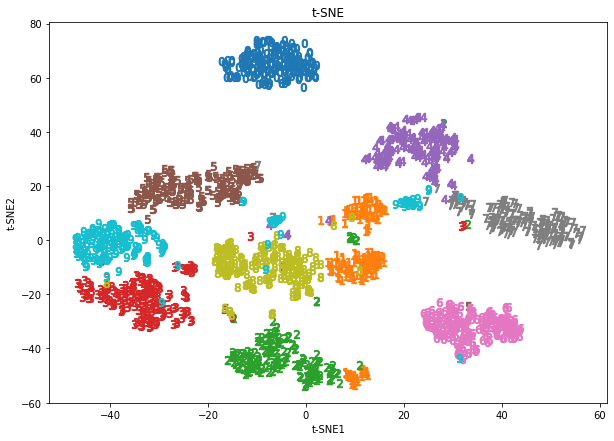

In [14]:
# t-SNE
Y = TSNE(n_components=n_components,
         perplexity=30, n_iter=1000,
         random_state=0).fit_transform(X)
plt.figure(figsize=(10,7))
plt.title("t-SNE")
for i in range(n_class):
    marker = '${}$'.format(i)
    y1 = Y[ digits==i ]
    plt.scatter(y1[:, 0], y1[:, 1], marker=marker, s=70, label=i)
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

**Ans. t-SNE seems to be the most appropriate to show the structure of clusters for each digits**